In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Data Explanation
#### ---------------------------
#### No Null values
#### Column Explanation:
##### DocAvailability - doctor availability per 100,000 residents
##### HospitalAvailability - hospital availability per 100,000 residents
##### AnnualIncome - annual per capita income in thousands of dollars
##### PopulationDensity - population density people per square mile
##### DeathRate - death rate per 1000 residents(target)
#### ---------------------------




## Let us read the data

In [48]:
health_data=pd.read_csv("data/health_data.csv")

## Let us see how our data looks like

In [49]:
health_data.head()

,DocAvailability,HospitalAvailability,AnnualIncome,PopulationDensity,DeathRate
0,78,284,9.1,109,8.0
1,68,433,8.7,144,9.3
2,70,739,7.2,113,7.5
3,96,1792,8.9,97,8.9
4,74,477,8.3,206,10.2


#### We will visualize Death Rate with a Histogram (Ignore if you do not know how to plot data yet)

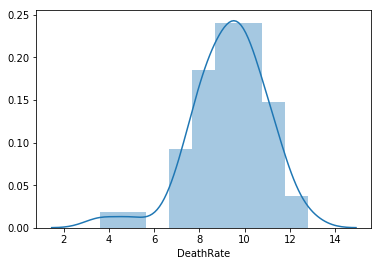

In [50]:
sns.distplot(health_data['DeathRate'])

### This looks like a slightly negatively skewed Normal Distribution

#### Let us visualize the correlation of various features with the death rate

In [51]:
corr_matrix=health_data.corr()

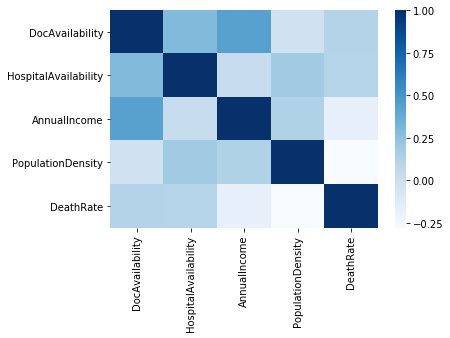

In [52]:
sns.heatmap(corr_matrix,cmap="Blues")

In [53]:
corr_matrix['DeathRate'].sort_values(ascending=False)

DeathRate               1.000000
DocAvailability         0.115765
HospitalAvailability    0.110590
AnnualIncome           -0.171992
PopulationDensity      -0.277607
Name: DeathRate, dtype: float64

#### No huge correlation noticed between one feature and the death rate

In [54]:
## Let us split the columns into target and features. In our case, we are predicting the Death rate, which is our target, y and the other columns togther are features, X
y=health_data.loc[:,'DeathRate']
del health_data['DeathRate']
X=health_data

### Let us break the data into training and test sets with a 80/20 ratio

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [56]:
X_train.shape, X_test.shape

((42, 4), (11, 4))

### So we have 42 training samples and 11 test samples. Let us fit linear regression on our training set

In [57]:
from sklearn import linear_model
linear_regressor=linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Let us move on and predict how much does our model predict as the salary for the test set

In [58]:
y_pred=linear_regressor.predict(X_test) ## Though we are predicting salary for a single value, we still have to pass a 2D array

In [59]:
y_pred

array([  7.99294257,   9.6888329 ,   8.97676542,   9.66839489,
        10.12758915,   8.46803818,   8.54632127,   9.4626596 ,
         9.60824556,   9.74864272,   8.96441463])

### Let us now calculate the Root Mean Squared Error for our prediction

In [60]:
from sklearn.metrics import mean_squared_error
import math

In [61]:
mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mean_squared_error(y_test, y_pred))

In [62]:
mse, rmse

(1.958086669879392, 1.3993165009673088)

## A fairly reasonable RMSE